In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
G = nx.Graph()

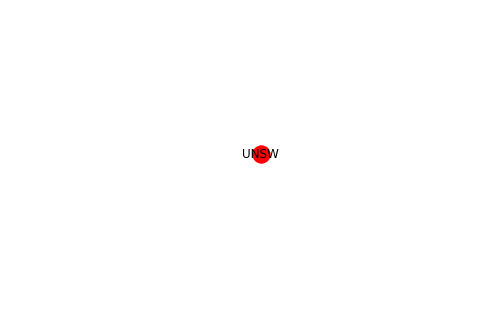

In [3]:
G.add_node('UNSW')
nx.draw(G, with_labels=True)

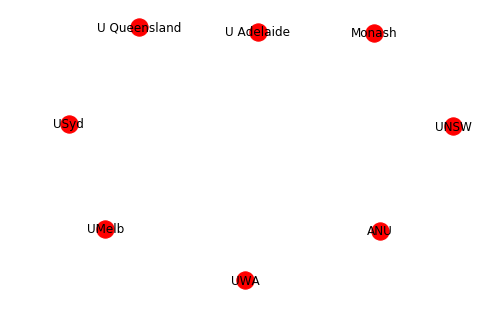

In [4]:
Go_Eight = ['UNSW','ANU','Monash','U Adelaide','U Queensland','USyd','UMelb','UWA']
G.add_nodes_from(Go_Eight)
nx.draw(G, with_labels=True)

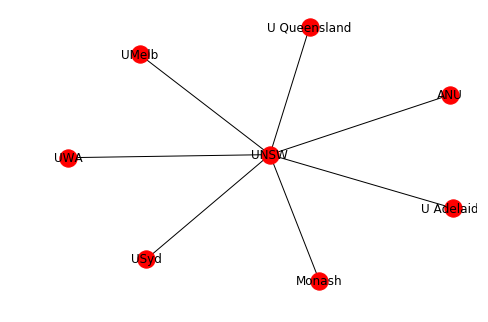

In [5]:
for i in Go_Eight:
    G.add_edge(i,'UNSW')
nx.draw(G, with_labels=True)

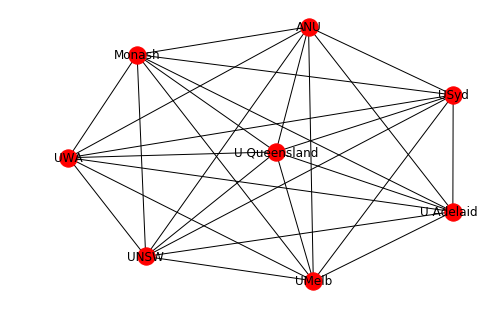

In [6]:
for i in Go_Eight:
    for j in Go_Eight:
        G.add_edge(i,j,label='Go8', weight='1')
        
nx.draw(G, with_labels=True)

In [7]:
Russell_Group = ['University of Birmingham',
                 'University of Bristol',
                 'University of Cambridge',
                'Cardiff University',
                'Durham University',
                'University of Edinburgh',
                'University of Exeter',
                 'University of Glasgow',
                'Imperial College London',
                'Kings College London',
                 'University of Leeds',
                'London School of Economics&Political Science',
                'University of Manchester',
                'Newcastle University',
                'University of Nottingham',
                 'University of Oxford',
                'Queen Mary, University of London',
                'Queens University Belfast',
                'University of Sheffield',
                'University of Southanpton',
                'University College London',
                'University of Warwick',
                'University of York']
PLUS_Alliance = ['UNSW','Kings College London','Arizona State University']
US_Group = ['Arizona State University', 'Ohio State University', 'Penn State']

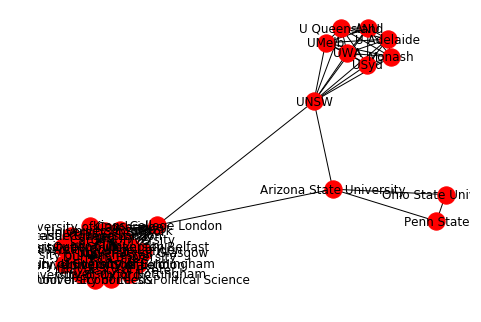

In [8]:
for i in Russell_Group:
    for j in Russell_Group:
        G.add_edge(i,j,label='Russell_Group', weight='1')

for i in PLUS_Alliance:
    for j in PLUS_Alliance:
        G.add_edge(i,j,label='PLUS_Alliance', weight='1')
        
for i in US_Group:
    for j in US_Group:
        G.add_edge(i,j,label='US_Group', weight='1')

nx.draw(G,with_labels=True)

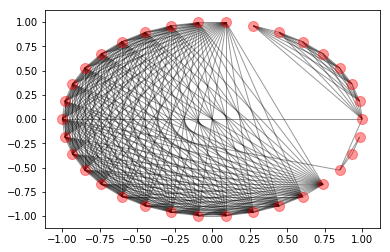

In [9]:
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G,pos, node_shape='o', alpha=0.4, node_size =100)
nx.draw_networkx_edges(G,pos, style='solid', alpha = 0.4)

plt.show()

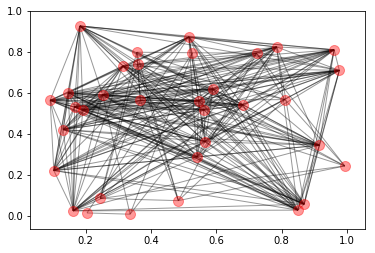

In [10]:
pos = nx.random_layout(G)

nx.draw_networkx_nodes(G,pos, node_shape='o', alpha=0.4, node_size =100)
nx.draw_networkx_edges(G,pos, style='solid', alpha = 0.4)

plt.show()

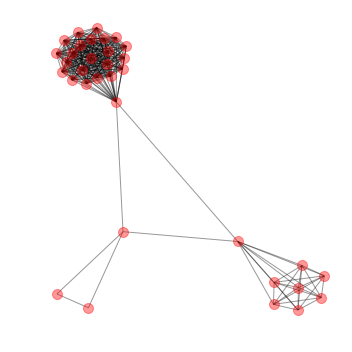

In [11]:
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_shape='o', alpha=0.4, node_size =100)
nx.draw_networkx_edges(G,pos, style='solid', alpha = 0.4)
plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 321
Average degree:  18.8824


# Centrality Measures

In [13]:
G.degree()

DegreeView({'UNSW': 11, 'ANU': 9, 'Monash': 9, 'U Adelaide': 9, 'U Queensland': 9, 'USyd': 9, 'UMelb': 9, 'UWA': 9, 'University of Birmingham': 24, 'University of Bristol': 24, 'University of Cambridge': 24, 'Cardiff University': 24, 'Durham University': 24, 'University of Edinburgh': 24, 'University of Exeter': 24, 'University of Glasgow': 24, 'Imperial College London': 24, 'Kings College London': 26, 'University of Leeds': 24, 'London School of Economics&Political Science': 24, 'University of Manchester': 24, 'Newcastle University': 24, 'University of Nottingham': 24, 'University of Oxford': 24, 'Queen Mary, University of London': 24, 'Queens University Belfast': 24, 'University of Sheffield': 24, 'University of Southanpton': 24, 'University College London': 24, 'University of Warwick': 24, 'University of York': 24, 'Arizona State University': 6, 'Ohio State University': 4, 'Penn State': 4})

In [14]:
degree_dict = dict(G.degree(G.nodes))
sorted_names = sorted(degree_dict, key = lambda x:degree_dict[x])

for k in sorted_names:
    print('{}:{}'.format(k, degree_dict[k]))

Ohio State University:4
Penn State:4
Arizona State University:6
ANU:9
Monash:9
U Adelaide:9
U Queensland:9
USyd:9
UMelb:9
UWA:9
UNSW:11
University of Birmingham:24
University of Bristol:24
University of Cambridge:24
Cardiff University:24
Durham University:24
University of Edinburgh:24
University of Exeter:24
University of Glasgow:24
Imperial College London:24
University of Leeds:24
London School of Economics&Political Science:24
University of Manchester:24
Newcastle University:24
University of Nottingham:24
University of Oxford:24
Queen Mary, University of London:24
Queens University Belfast:24
University of Sheffield:24
University of Southanpton:24
University College London:24
University of Warwick:24
University of York:24
Kings College London:26


In [15]:
degree_dict = dict(G.degree(G.nodes()))

nx.set_node_attributes(G, degree_dict, 'degree')
print(G.node['UNSW'])

{'degree': 11}


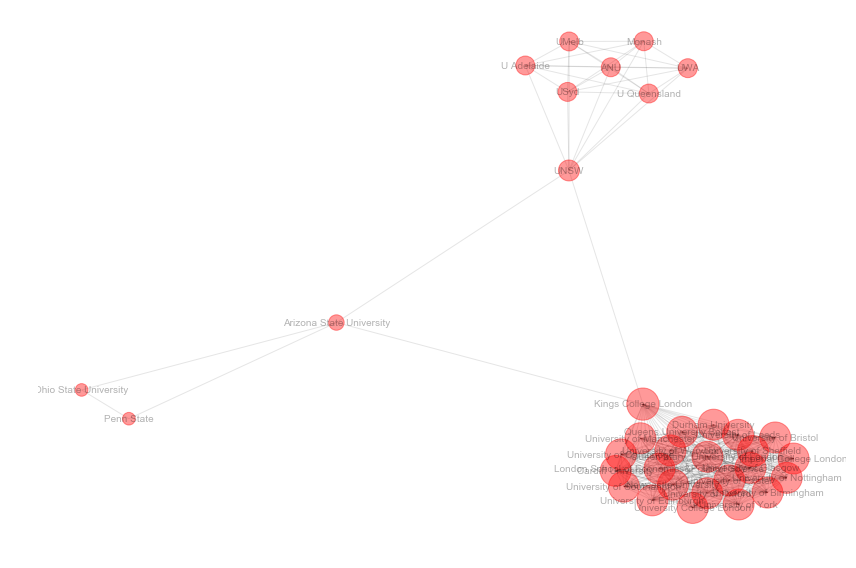

In [16]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=degree_dict.keys(), node_size = [v*40 for v in degree_dict.values()], alpha = 0.4)

nx.draw_networkx_edges(G,pos,style='solid', alpha = 0.1)

nx.draw_networkx_labels(G,pos,font_size=10, font_color='k', font_family='arial', font_weight='normal',alpha=0.3,ax=None)

plt.axis('off')
plt.tight_layout()
plt.show()

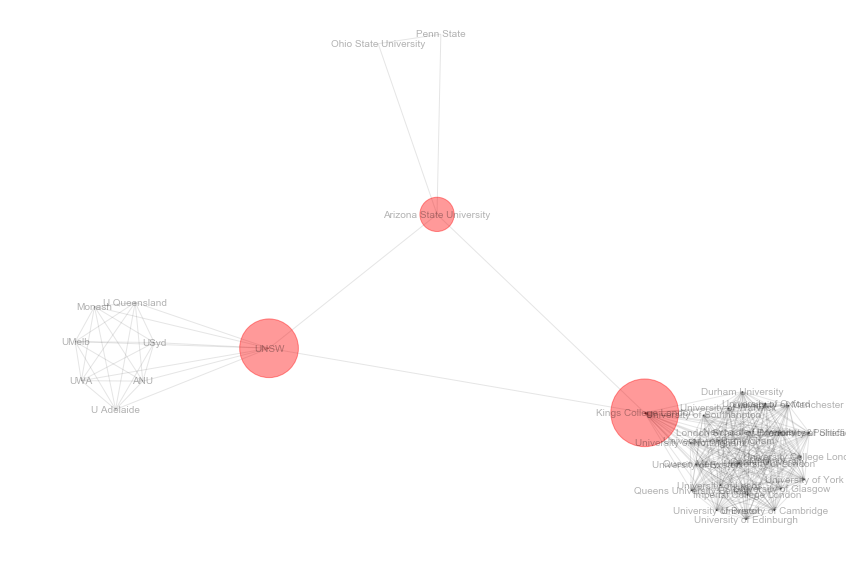

In [17]:
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'BC')

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=betweenness_dict.keys(), node_size = [v*10000 for v in betweenness_dict.values()], alpha = 0.4)

nx.draw_networkx_edges(G,pos,style='solid', alpha = 0.1)

nx.draw_networkx_labels(G,pos,font_size=10, font_color='k', font_family='arial', font_weight='normal',alpha=0.3,ax=None)

plt.axis('off')
plt.tight_layout()
plt.show()

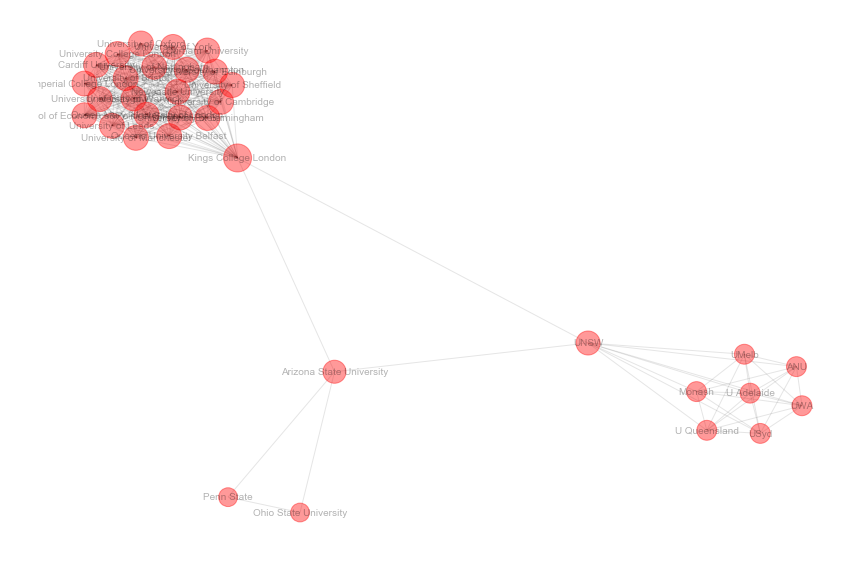

In [18]:
closeness_dict = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_dict, 'BC')

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=closeness_dict.keys(), node_size = [v*1000 for v in closeness_dict.values()], alpha = 0.4)

nx.draw_networkx_edges(G,pos,style='solid', alpha = 0.1)

nx.draw_networkx_labels(G,pos,font_size=10, font_color='k', font_family='arial', font_weight='normal',alpha=0.3,ax=None)

plt.axis('off')
plt.tight_layout()
plt.show()

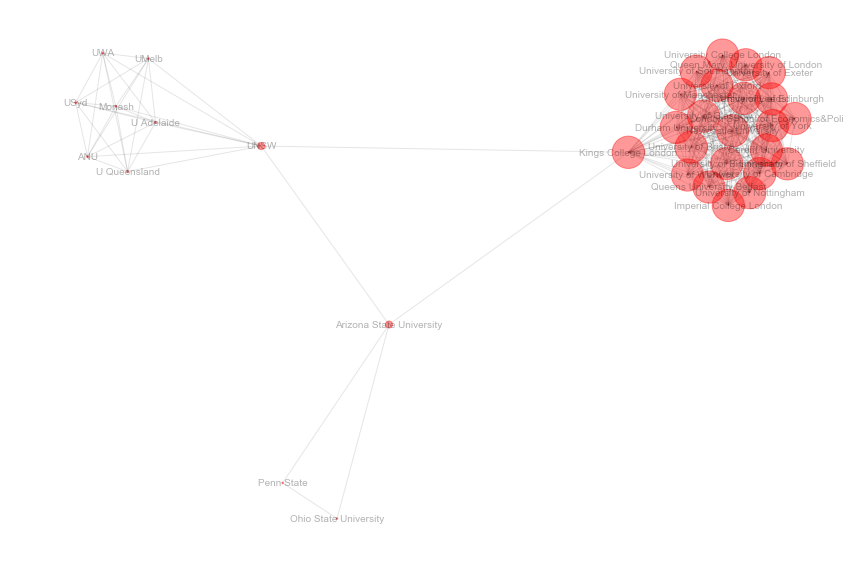

In [23]:
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'BC')

plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=eigenvector_dict.keys(), node_size = [v*5000 for v in eigenvector_dict.values()], alpha = 0.4)

nx.draw_networkx_edges(G,pos,style='solid', alpha = 0.1)

nx.draw_networkx_labels(G,pos,font_size=10, font_color='k', font_family='arial', font_weight='normal',alpha=0.3,ax=None)

plt.axis('off')
plt.tight_layout()
plt.show()

# Airport Network

In [75]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

In [76]:
airport_col = ['ID','Name','City','Country','IATA','ICAO','Lat','Long','Alt','Timezone','DST','Tz database time zone','Type', 'source']
airport_df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names = airport_col, index_col = 0)

routes_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID', 'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',names = routes_cols)

routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
routes_df = routes_df.dropna(subset=['Source Airport ID', 'Dest Airport ID'])

routes_sum = pd.DataFrame(routes_df.groupby(['Source Airport','Dest Airport']).size().reset_index(name='counts'))

routes_sum = pd.merge(routes_sum, airport_df, left_on='Source Airport', right_on='IATA')
routes_sum = pd.merge(routes_sum, airport_df, left_on='Dest Airport',right_on='IATA')

routes_sum['flights'] = routes_sum['counts'].astype(int)

graph = nx.from_pandas_edgelist(routes_sum, 'Source Airport', 'Dest Airport', 'flights')
graph

In [77]:
graph.nodes(data=True)
graph.edges(data=True)
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 3179
Number of edges: 18617
Average degree:  11.7125


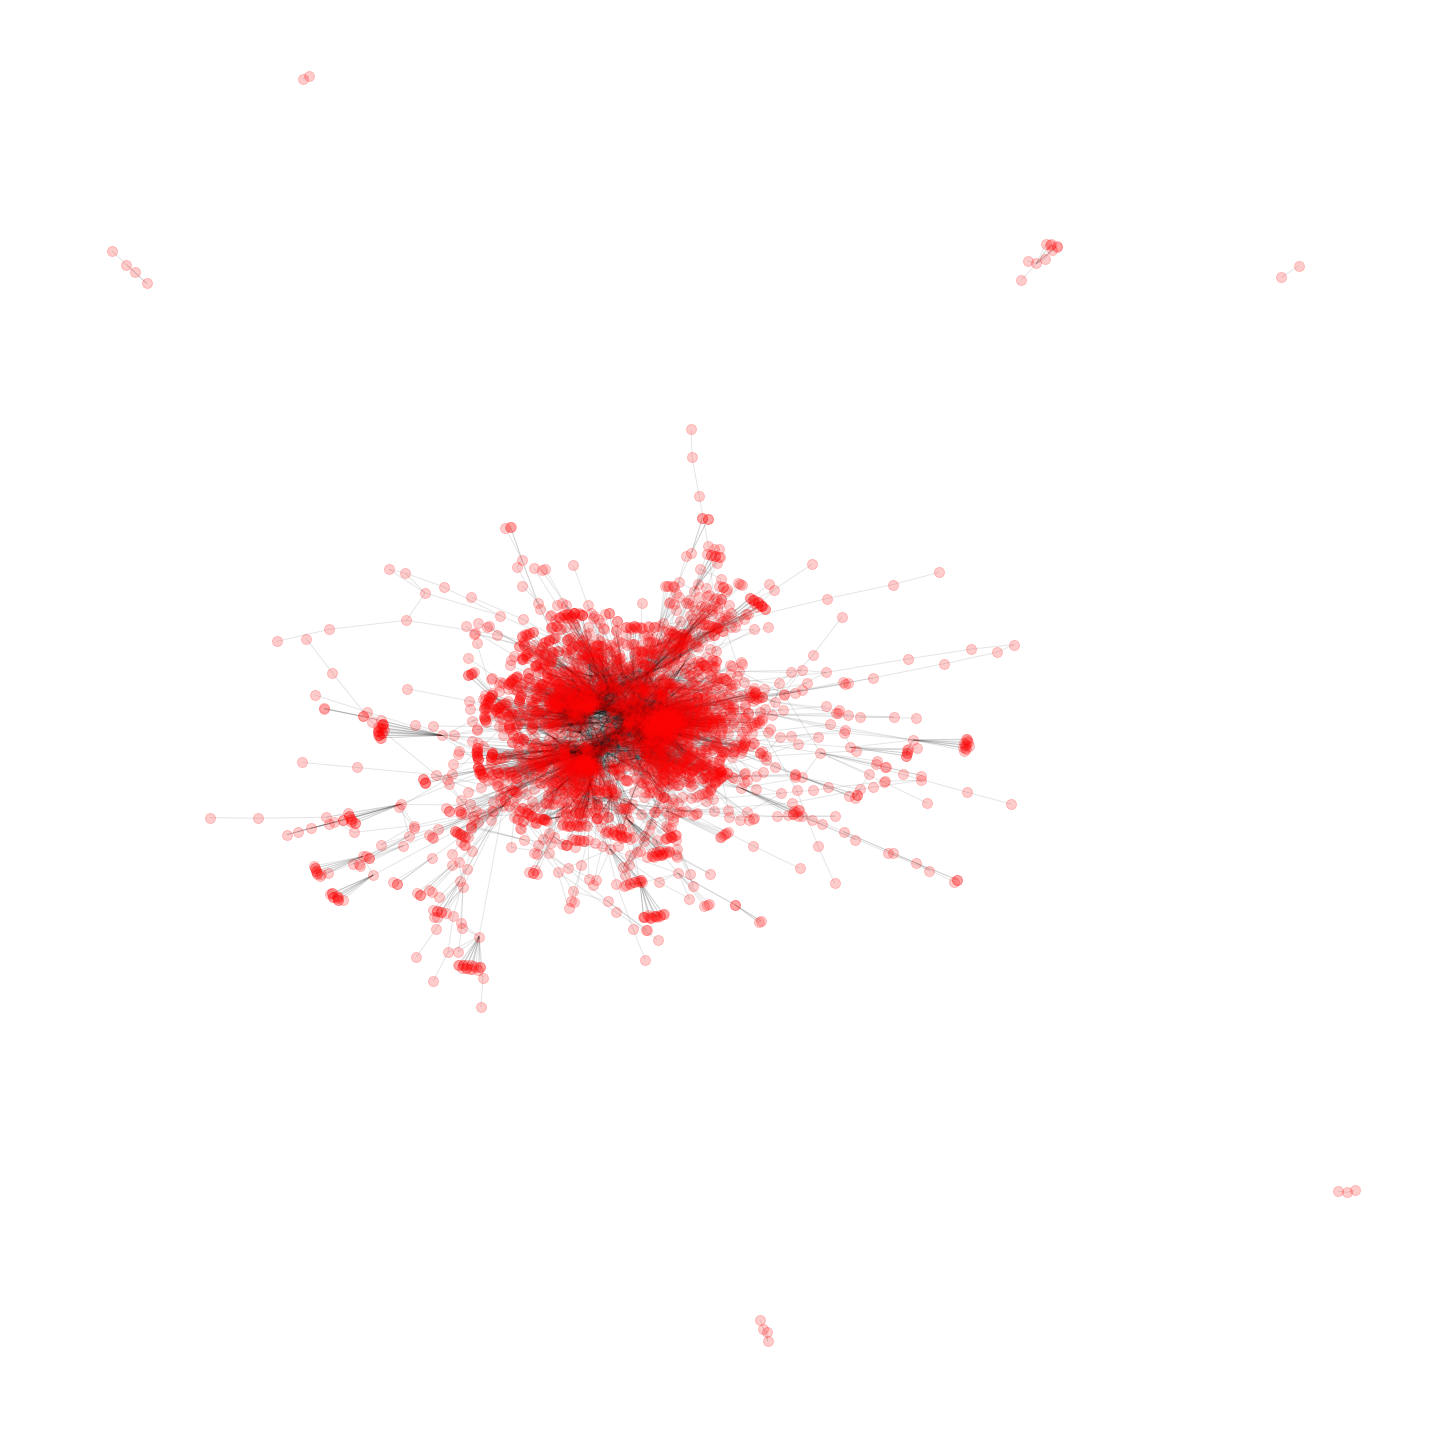

In [84]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, alpha = 0.2, node_size=100)
nx.draw_networkx_edges(graph, pos, style = 'solid', alpha=0.1)
plt.axis('off')
plt.tight_layout()
plt.show()

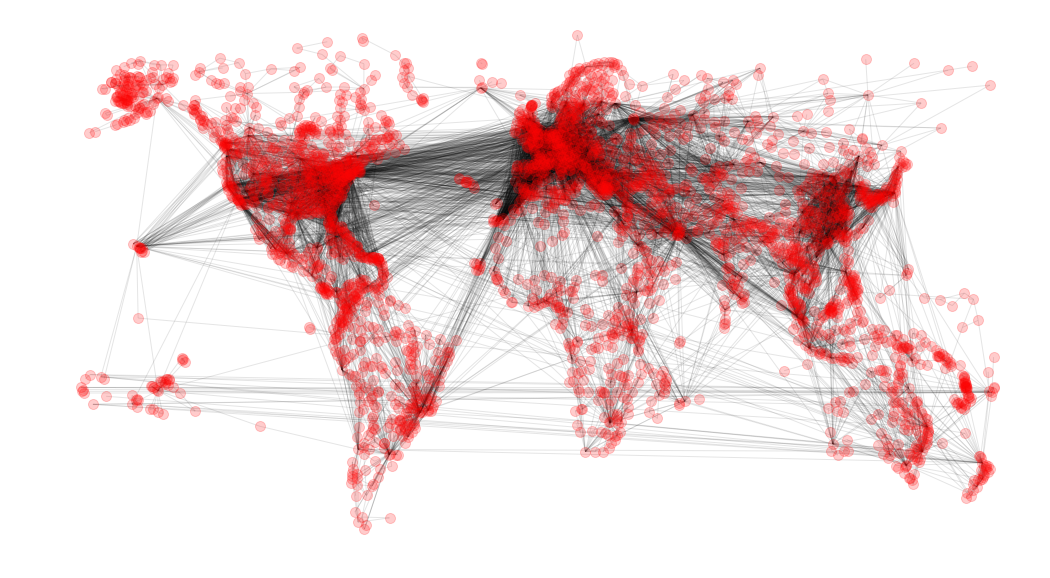

In [85]:
routes_lats = airport_df[['IATA','Long','Lat']]
xy = routes_lats.drop_duplicates()
xy['pos'] = list(zip(xy.Long, xy.Lat))
routes_lats = xy[['IATA', 'pos']]
routes_lats = routes_lats.set_index('IATA')
routes_lats = routes_lats.to_dict('index')
pos_dict={}

for key,value in routes_lats.items():
    for key2,value2 in value.items():
        pos_dict[key] = np.asarray(value2)
        
plt.figure(figsize=(18,10))
nx.draw_networkx_nodes(graph, pos_dict, alpha=0.2, node_size=100)
nx.draw_networkx_edges(graph, pos_dict, style='solid', alpha=0.1)
plt.axis('off')
plt.tight_layout
plt.show()

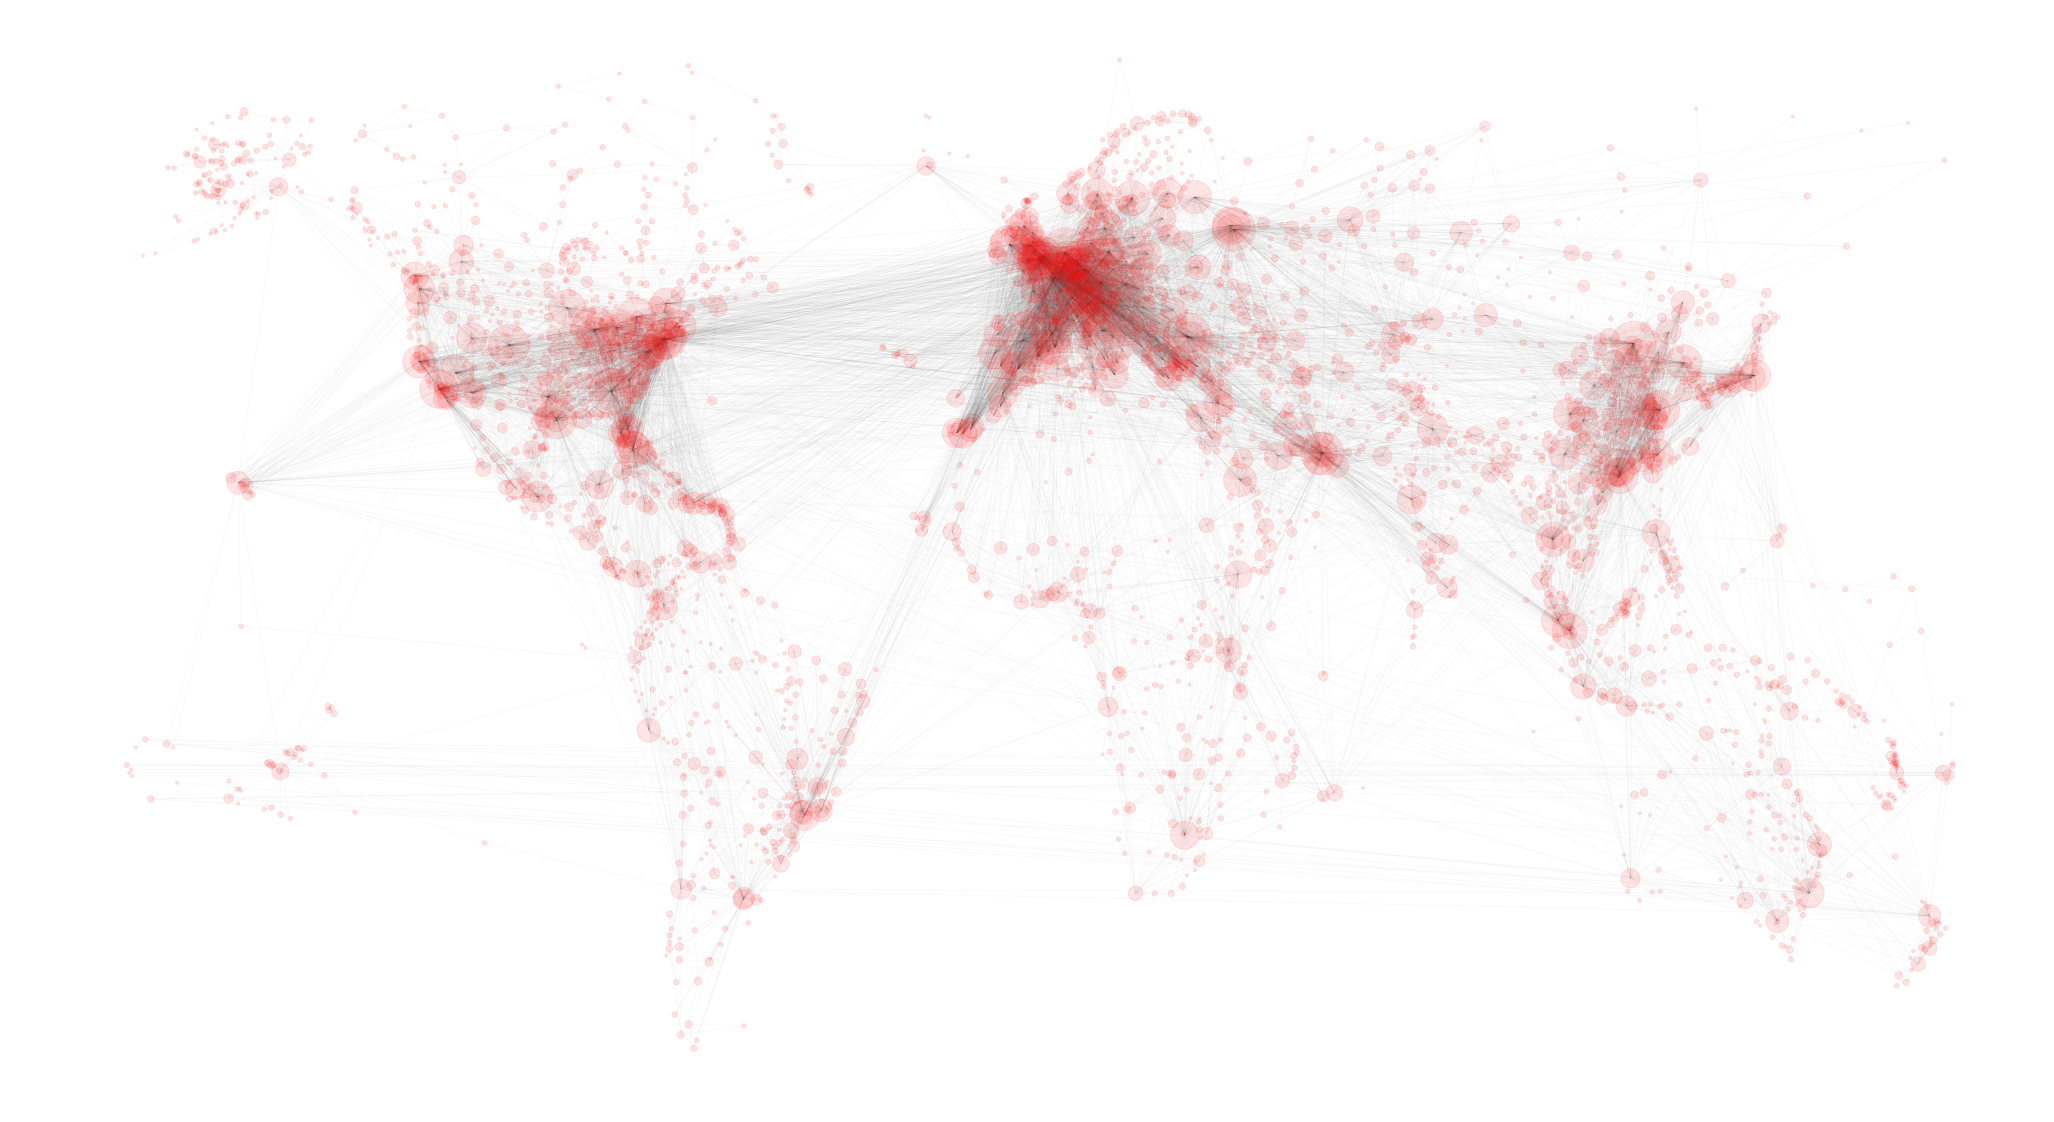

In [93]:
degree_dict = dict(graph.degree(graph.nodes()))
nx.set_node_attributes(graph,degree_dict,'degree')

routes_lats = airport_df[['IATA','Long','Lat']]
xy = routes_lats.drop_duplicates()
xy['pos'] = list(zip(xy.Long,xy.Lat))
routes_lats = xy[['IATA', 'pos']]
routes_lats = routes_lats.set_index('IATA')
routes_lats = routes_lats.to_dict('index')
pos_dict={}

for key,value in routes_lats.items():
    for key2,value2 in value.items():
        pos_dict[key] = np.asarray(value2)
        
plt.figure(figsize=(36,20))
flight_weight = nx.get_edge_attributes(graph,'flights')
nx.draw_networkx_nodes(graph, pos_dict,nodelist = degree_dict.keys(),node_size = [v*10 for v in degree_dict.values()],node_shape='o', alpha=0.1)
nx.draw_networkx_edges(graph, pos_dict, style='solid',color='k',alpha=0.025)
plt.axis('off')
plt.tight_layout
plt.show()

In [83]:
sorted_names = sorted(degree_dict, key=lambda x:degree_dict[x])
for k in sorted_names:
    print('{}:{}'.format(k, degree_dict[k]))

ELU:1
TEE:1
TGR:1
VDA:1
CND:1
ISE:1
KFS:1
KZR:1
LEH:1
AGB:1
CBH:1
AUR:1
LAI:1
LPY:1
UIP:1
KID:1
OER:1
LEN:1
RGS:1
SLM:1
KRP:1
RNN:1
SGD:1
BDU:1
OLA:1
RRS:1
VDB:1
ILD:1
ESL:1
GBB:1
GRV:1
KVK:1
LWN:1
OGZ:1
OSW:1
PES:1
PEZ:1
RGK:1
IAR:1
GDZ:1
THN:1
BRQ:1
DND:1
AAY:1
AXK:1
KYZ:1
ODO:1
UKX:1
ACZ:1
HDM:1
AFZ:1
BJB:1
BXR:1
IIL:1
KHD:1
PFQ:1
SDG:1
YES:1
ABY:1
BQK:1
CSG:1
DHN:1
GTR:1
MEI:1
MSL:1
PIB:1
VLD:1
FLO:1
LYH:1
PGV:1
CIU:1
ESC:1
PLN:1
ALO:1
CMX:1
DBQ:1
EAU:1
FOE:1
MKG:1
PAH:1
SUX:1
HVN:1
IPT:1
BLV:1
PSM:1
ABI:1
ACT:1
BPT:1
GCK:1
GGG:1
JLN:1
LAW:1
ROW:1
SJT:1
SPS:1
TXK:1
KMS:1
NYI:1
TKD:1
TML:1
AOE:1
TTA:1
JOS:1
KAD:1
QUO:1
LUR:1
WLK:1
ABM:1
HID:1
WEI:1
CNM:1
BFF:1
CEZ:1
EGE:1
GUC:1
HDN:1
LAR:1
LBF:1
MCK:1
MTJ:1
PUB:1
RIW:1
SHR:1
HOB:1
VCT:1
LAM:1
SCK:1
CLD:1
LTO:1
MCE:1
MMH:1
PRC:1
VIS:1
SLN:1
MBL:1
ABR:1
BJI:1
HIB:1
PDT:1
FLG:1
ALW:1
EAT:1
YKM:1
CIC:1
MOD:1
RDD:1
BTM:1
CDC:1
CNY:1
EKO:1
PIH:1
TWF:1
VEL:1
ABS:1
EJH:1
RAH:1
TUI:1
MQX:1
IBA:1
ILR:1
SKO:1
YOL:1
DPO:1
ARM:1
AVV:1
LSY:1
MRZ:

YFH:3
YBX:3
YIF:3
YSO:3
YNA:3
YCS:3
YEK:3
YUT:3
YXN:3
YHR:3
YCO:3
YHI:3
YHK:3
YYH:3
YYE:3
YMO:3
YWP:3
YUD:3
YMN:3
YVZ:3
BJA:4
BLJ:4
GHA:4
QSF:4
TLM:4
PUF:4
SFA:4
DIY:4
EZS:4
GNY:4
MQM:4
MZR:4
VAN:4
CFR:4
CAY:4
RDZ:4
TOE:4
MLN:4
HUY:4
GEV:4
HAD:4
SDL:4
VBY:4
FAE:4
HOV:4
SOG:4
LBC:4
SCN:4
ABA:4
AKX:4
BHK:4
BTK:4
CXR:4
DMB:4
GDX:4
MCX:4
PKC:4
PYJ:4
TJU:4
TOF:4
UCT:4
OSI:4
PMF:4
GXF:4
HOD:4
BUZ:4
HEA:4
KDH:4
SRY:4
KER:4
AZO:4
BTR:4
EVV:4
FAY:4
GPT:4
GRB:4
MBS:4
TRI:4
HTS:4
SCE:4
YNG:4
DLH:4
TOL:4
CRP:4
BGF:4
BJM:4
MWZ:4
HTI:4
IDA:4
MOT:4
DGO:4
ZLO:4
BQN:4
STS:4
LWS:4
GIZ:4
PZU:4
LLI:4
RMF:4
MQL:4
BHQ:4
TBU:4
TWB:4
NRL:4
FNI:4
KSC:4
TGM:4
CEN:4
REG:4
ELS:4
MQP:4
PLZ:4
KLU:4
MVY:4
GYS:4
JIU:4
LUM:4
ENY:4
DLU:4
HLH:4
NDG:4
WUA:4
SHP:4
TAE:4
ELH:4
ZSA:4
EBU:4
AOK:4
JSH:4
KIT:4
LXS:4
UTH:4
IXJ:4
IXR:4
IXZ:4
CJJ:4
FNJ:4
JXA:4
RLK:4
YIC:4
GLK:4
CDB:4
MCG:4
DUD:4
HLZ:4
NSN:4
CTL:4
LRE:4
SDK:4
SOC:4
TGG:4
TRZ:4
PEI:4
VVC:4
IQT:4
EQS:4
SLA:4
XAP:4
USH:4
JOI:4
PFB:4
UBA:4
VDC:4
ARI:4
CCP:4
CJC:4
LSC:

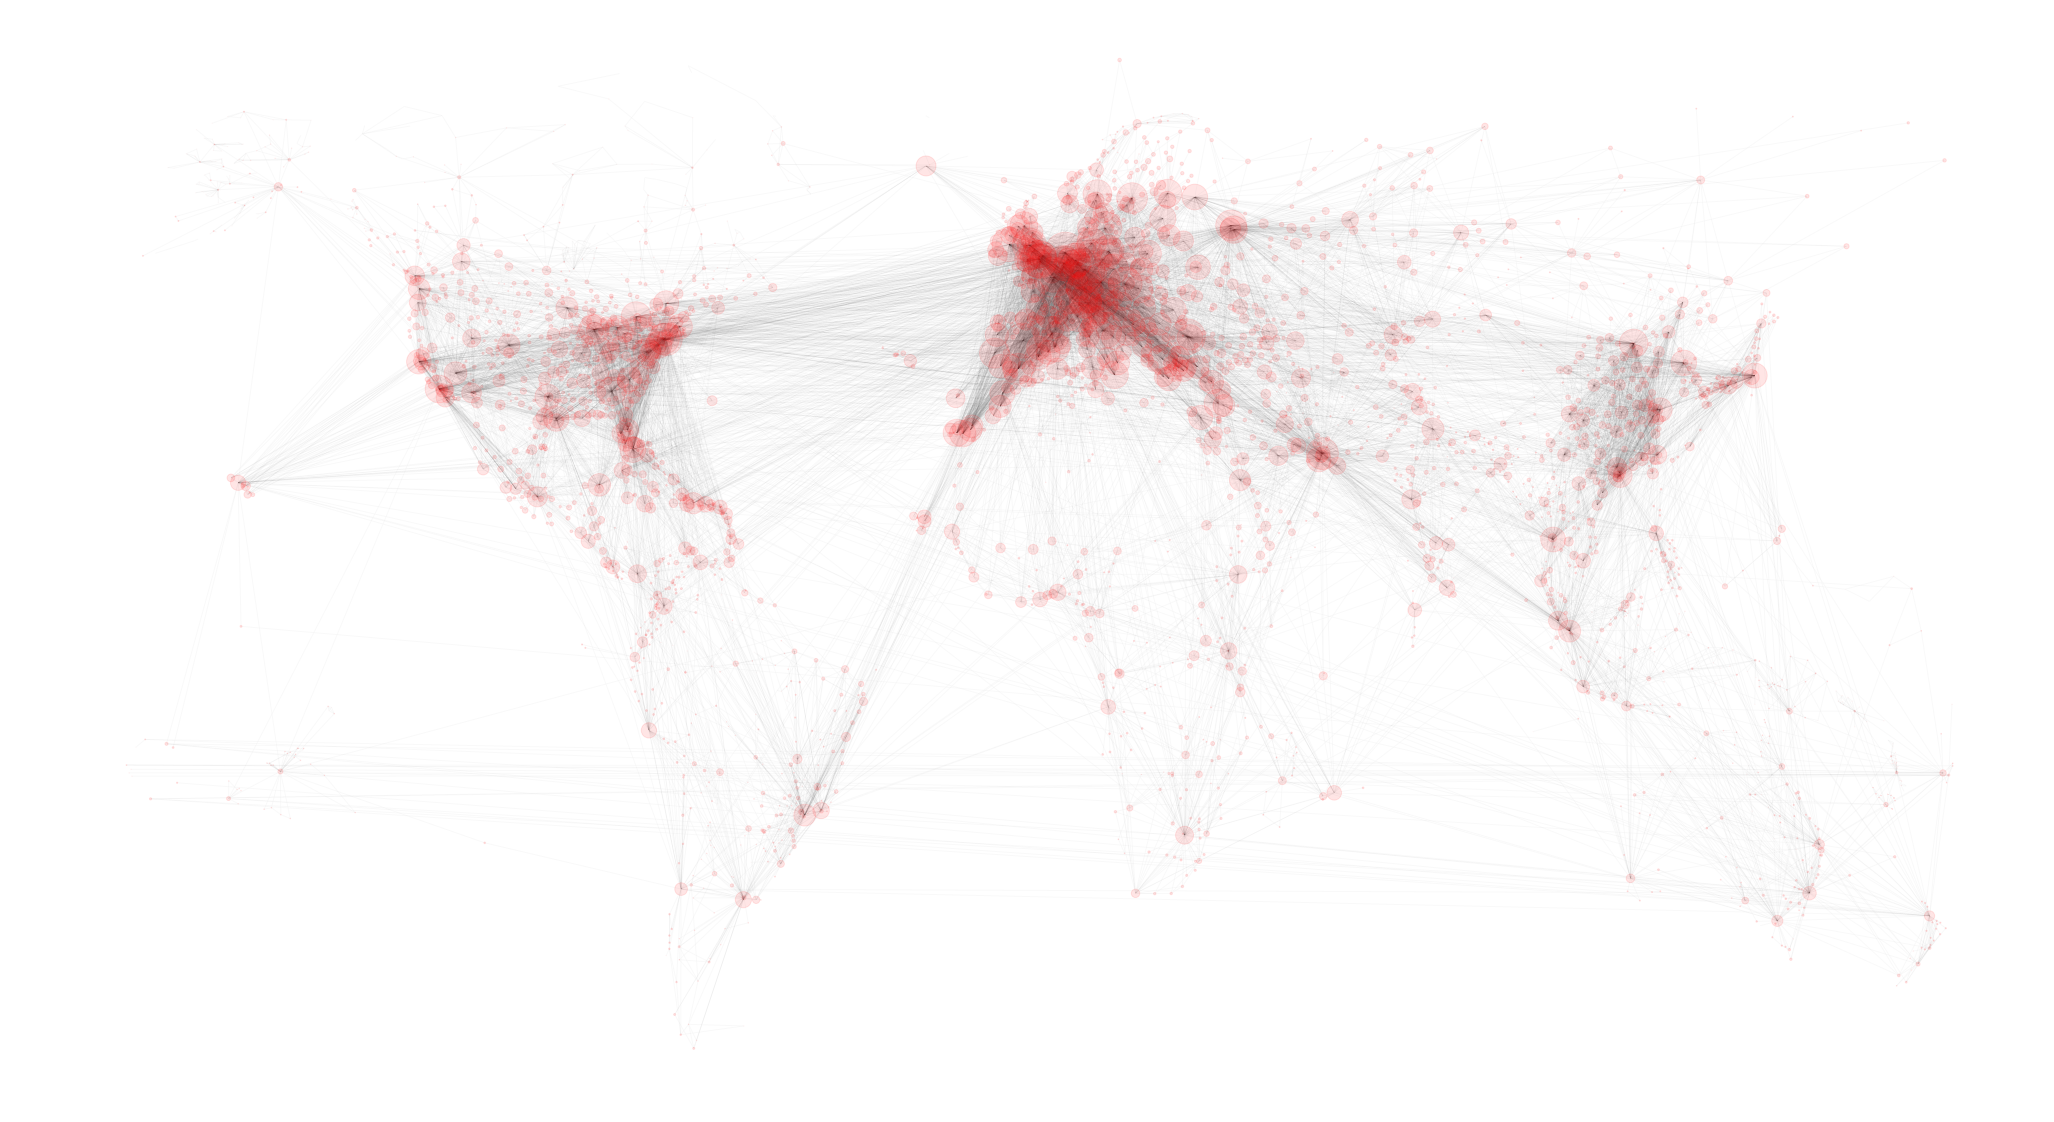

In [94]:
eigenvector_dict = nx.eigenvector_centrality(graph)
nx.set_node_attributes(graph, eigenvector_dict, 'eigenvector_dict')

routes_lats = airport_df[['IATA','Long','Lat']]
xy = routes_lats.drop_duplicates()
xy['pos'] = list(zip(xy.Long,xy.Lat))
routes_lats = xy[['IATA', 'pos']]
routes_lats = routes_lats.set_index('IATA')
routes_lats = routes_lats.to_dict('index')
pos_dict={}

for key,value in routes_lats.items():
    for key2,value2 in value.items():
        pos_dict[key] = np.asarray(value2)
        
plt.figure(figsize=(36,20))
flight_weight = nx.get_edge_attributes(graph,'flights')
nx.draw_networkx_nodes(graph, pos_dict,nodelist = eigenvector_dict.keys(),node_size = [v*10000 for v in eigenvector_dict.values()],node_shape='o', alpha=0.1)
nx.draw_networkx_edges(graph, pos_dict, style='solid',color='k',alpha=0.025)
plt.axis('off')
plt.tight_layout
plt.show()